In [1]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

i Loading Socrates
Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignette

## QC data 5/23/2023

In [2]:
reference_genome_path <- "/home/jpm73279/genome_downloads/Osativa/v7.0/"
#analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Orzchloa_fusca/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/"

In [ ]:
Orz_P1.rep1 <- paste0(analysis_path, "Os.leaf1.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Osativa_323_v7.0.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Osativa_323_v7.0.chrom.sizes")
pre <- "Oryza_sat.sciATAC_rep1"



#Load Object
Orz_P1.leaf.rep1 <- loadBEDandGenomeData(Orz_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Os.leaf1.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Osativa/v7.0/annotation/Osativa_323_v7.0.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Osativa/v7.0/assembly/Osativa_323_v7.0.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...



In [ ]:
memory.limit(size=12000000000)
Orz_P1.leaf.rep1.no_organelle <- countRemoveOrganelle(Orz_P1.leaf.rep1, 
                                             org_scaffolds = c("ChrMt", "ChrPt"), 
                                             remove_reads = TRUE)

# call ACRs
sb_temp_dir <- paste0(analysis_path, "Orz_P1.leaf.rep1.tmp")
Orz_P1.leaf.rep1.no_organelle <- callACRs(Orz_P1.leaf.rep1.no_organelle, 
                genomesize=3e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

In [ ]:
Orz_P1.leaf.rep1.meta <- buildMetaData(Orz_P1.leaf.rep1.no_organelle,
                                     tss.window=1000,
                                     verbose=TRUE)

In [ ]:
str(Orz_P1.leaf.rep1.meta)

Making Dotplot

... Filtering Cells based of Oragnelle Reads



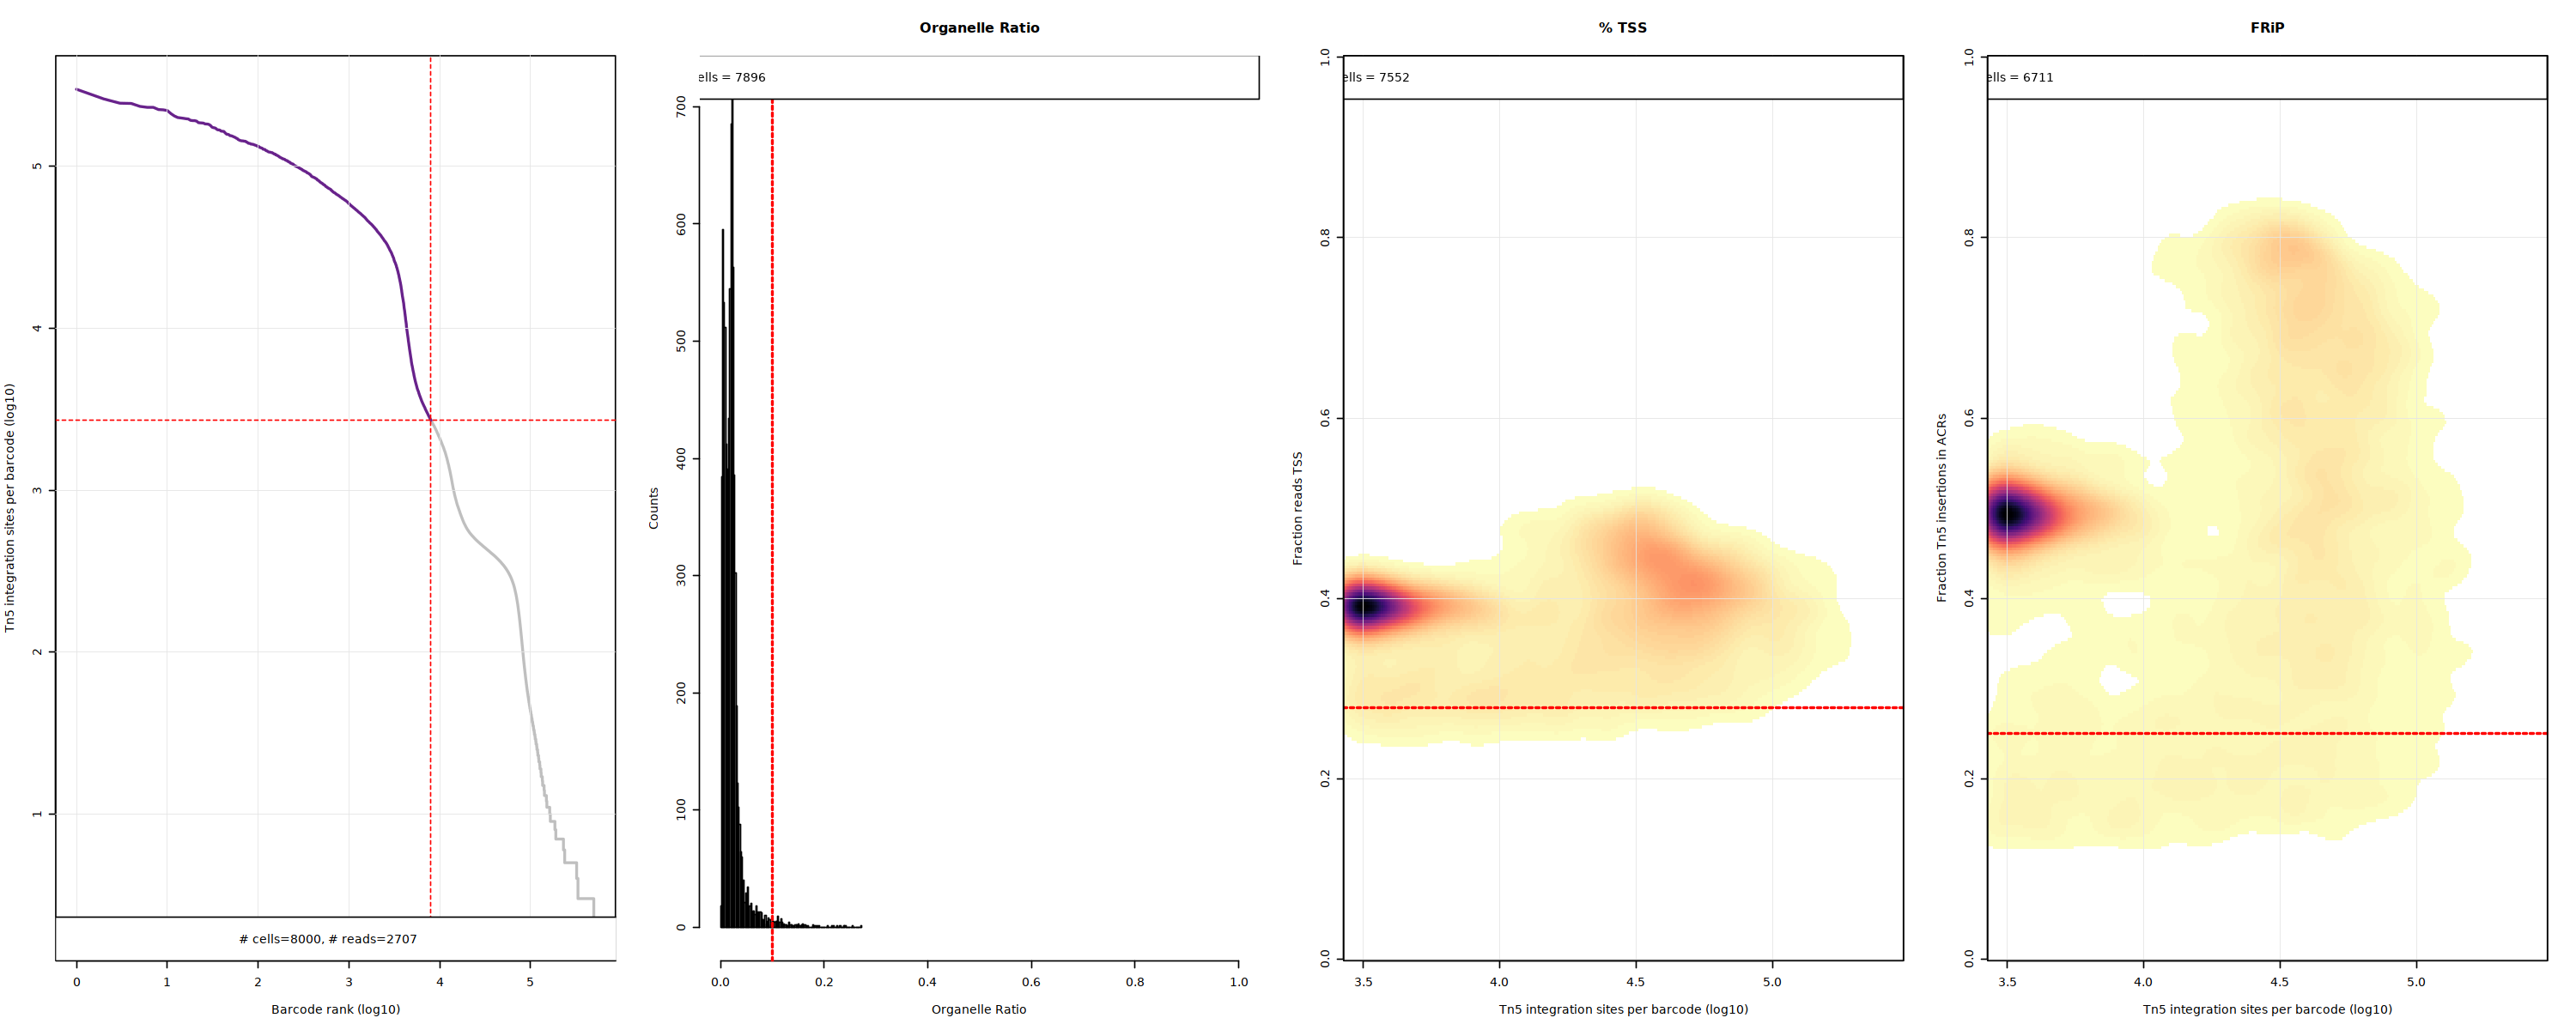

In [7]:
#library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/QC_output/imgs/"

options(repr.plot.width=25, repr.plot.height=10)
Orz_P1.leaf.rep1.meta_file <- findCells(Orz_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=1000,
                                        max.cells=8000,
                                        min.cells = 200,
                                        min.tn5=1000,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.10,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.1,
                                        prefix=NULL)


In [ ]:
head(Orz_P1.leaf.rep1.acrs$meta)

In [8]:
library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/QC_output/imgs/"
pre <- "Orz_fusca.sciATAC_rep1"


options(repr.plot.width=25, repr.plot.height=10)
Orz_P1.leaf.rep1.meta <- findCells(Orz_P1.leaf.rep1.meta,
                                       doplot=T,
                                        set.tn5.cutoff=1000,
                                        max.cells=8000,
                                        min.cells = 200,
                                        min.tn5=1000,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.10,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.1,
                                        prefix=paste0(output_path_imgs, pre))


Warning message:
"package 'repr' was built under R version 4.2.1"
Making Dotplot

... Filtering Cells based of Oragnelle Reads



In [9]:
str(Orz_P1.leaf.rep1.meta)

List of 12
 $ bed    :'data.frame':	253876561 obs. of  5 variables:
  ..$ V1: chr [1:253876561] "Chr1" "Chr1" "Chr1" "Chr1" ...
  ..$ V2: int [1:253876561] 602 502 636 581 1147 1005 1005 1005 1148 1073 ...
  ..$ V3: int [1:253876561] 603 503 637 582 1148 1006 1006 1006 1149 1074 ...
  ..$ V4: chr [1:253876561] "CB:Z:CCCTCTCCACCTGGTG-1-Os.leaf1" "CB:Z:CCCTCTCCACCTGGTG-1-Os.leaf1" "CB:Z:GTTATGGCATTGTTCT-1-Os.leaf1" "CB:Z:GTTATGGCATTGTTCT-1-Os.leaf1" ...
  ..$ V5: chr [1:253876561] "-" "+" "-" "+" ...
 $ gff    :Reference class 'TxDb' [package "GenomicFeatures"] with 6 fields
  ..$ conn           :Formal class 'SQLiteConnection' [package "RSQLite"] with 8 slots
  .. .. ..@ ptr                :<externalptr> 
  .. .. ..@ dbname             : chr ""
  .. .. ..@ loadable.extensions: logi TRUE
  .. .. ..@ flags              : int 70
  .. .. ..@ vfs                : chr ""
  .. .. ..@ ref                :<environment: 0x562319c3b730> 
  .. .. ..@ bigint             : chr "integer64"
  .. .. ..@

In [11]:
# generate sparse matrix
Orz_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Orz_P1.leaf.rep1.meta,
                            filtered=FALSE,
                            windows=500,
                            organelle_scaffolds = c("ChrMt", "ChrPt"), 
                            peaks=F,
                            blacklist="/home/jpm73279/genome_downloads/Osativa/Os.blacklist.haidong.filtered.named.bed",
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [31]:
str(Orz_P1.leaf.rep1.meta_file.filtered)

List of 13
 $ bed    :'data.frame':	253876561 obs. of  5 variables:
  ..$ V1: chr [1:253876561] "Chr1" "Chr1" "Chr1" "Chr1" ...
  ..$ V2: int [1:253876561] 602 502 636 581 1147 1005 1005 1005 1148 1073 ...
  ..$ V3: int [1:253876561] 603 503 637 582 1148 1006 1006 1006 1149 1074 ...
  ..$ V4: chr [1:253876561] "CB:Z:CCCTCTCCACCTGGTG-1-Os.leaf1" "CB:Z:CCCTCTCCACCTGGTG-1-Os.leaf1" "CB:Z:GTTATGGCATTGTTCT-1-Os.leaf1" "CB:Z:GTTATGGCATTGTTCT-1-Os.leaf1" ...
  ..$ V5: chr [1:253876561] "-" "+" "-" "+" ...
 $ gff    :Reference class 'TxDb' [package "GenomicFeatures"] with 6 fields
  ..$ conn           :Formal class 'SQLiteConnection' [package "RSQLite"] with 8 slots
  .. .. ..@ ptr                :<externalptr> 
  .. .. ..@ dbname             : chr ""
  .. .. ..@ loadable.extensions: logi TRUE
  .. .. ..@ flags              : int 70
  .. .. ..@ vfs                : chr ""
  .. .. ..@ ref                :<environment: 0x562319c3b730> 
  .. .. ..@ bigint             : chr "integer64"
  .. .. ..@

In [32]:
#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

Orz_P1.leaf.rep1.meta_file.filtered <- isCell(Orz_P1.leaf.rep1.meta_file.filtered,
      num.ref = 5000, verbose = TRUE)

 - converting triplet format to sparseMatrix

 - setting filters

 - parsing initial boundaries

 - normalizing distributions and creating references

 - performing feature selection (this step is a bottle-neck and may take a while to complete)

 - estimating correlations



In [34]:
#save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"
library(tidyverse)
passing_cells <- Orz_P1.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::filter(is_cell == 1)

Orz_P1.leaf.rep1.meta_file.filtered$meta.v3 <- passing_cells
    

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.1          v readr     2.1.4     
v forcats   1.0.0.9000     v stringr   1.5.0     
v lubridate 1.9.2          v tibble    3.2.1     
v purrr     1.0.1          v tidyr     1.3.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::%within%() masks IRanges::%within%()
x ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
x purrr::accumulate()   masks foreach::accumulate()
x readr::col_factor()   masks Socrates::col_factor(), scales::col_factor()
x dplyr::collapse()     masks IRanges::collapse()
x dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
x dplyr::count()        masks matrixStats::count()
x dplyr::desc()         masks IRanges::desc()
x purrr::discard()      masks Socrates::discard(), scales::discard()
x tidyr::expand()       masks Socrates::expand(), S4Vectors::expand(), Matrix::expand()
x dplyr::f

In [ ]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/"
pre <- "Oryza_sativa.scATAC_rep1"

# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Orz_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Orz_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



In [ ]:
sum(Orz_P1.leaf.rep1.meta_file.filtered$meta$ptmt < 2)

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
library("dplyr")
Orz_P1.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::mutate(prop_ptmt = ptmt/total)  %>% 
    ggplot(., aes(prop_ptmt)) + geom_histogram(binwidth = 1)

### Working on second replicate

In [16]:
reference_genome_path <- "/home/jpm73279/genome_downloads/Osativa/v7.0/"
#analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Orzchloa_fusca/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/"

In [17]:
Orz_P1.rep2 <- paste0(analysis_path, "Os.leaf2.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Osativa_323_v7.0.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Osativa_323_v7.0.chrom.sizes")
pre <- "Oryza_sat.sciATAC_rep1"



#Load Object
Orz_P1.leaf.rep2 <- loadBEDandGenomeData(Orz_P1.rep2, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Os.leaf2.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Osativa/v7.0/annotation/Osativa_323_v7.0.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Osativa/v7.0/assembly/Osativa_323_v7.0.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [18]:
memory.limit(size=12000000000)
Orz_P1.leaf.rep2.no_organelle <- countRemoveOrganelle(Orz_P1.leaf.rep2, 
                                             org_scaffolds = c("ChrMt", "ChrPt"), 
                                             remove_reads = TRUE)

# call ACRs
sb_temp_dir <- paste0(analysis_path, "Orz_P1.leaf.rep1.tmp")
Orz_P1.leaf.rep2.no_organelle <- callACRs(Orz_P1.leaf.rep2.no_organelle, 
                genomesize=3e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Warning message:
"'memory.limit()' is Windows-specific"


[1] Inf

Identified 8048902 organeller reads ...

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Orz_P1.leaf.rep1.tmp' already exists"


In [19]:
Orz_P1.leaf.rep2.meta <- buildMetaData(Orz_P1.leaf.rep2.no_organelle,
                                     tss.window=1000,
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot

... Filtering Cells based of Oragnelle Reads



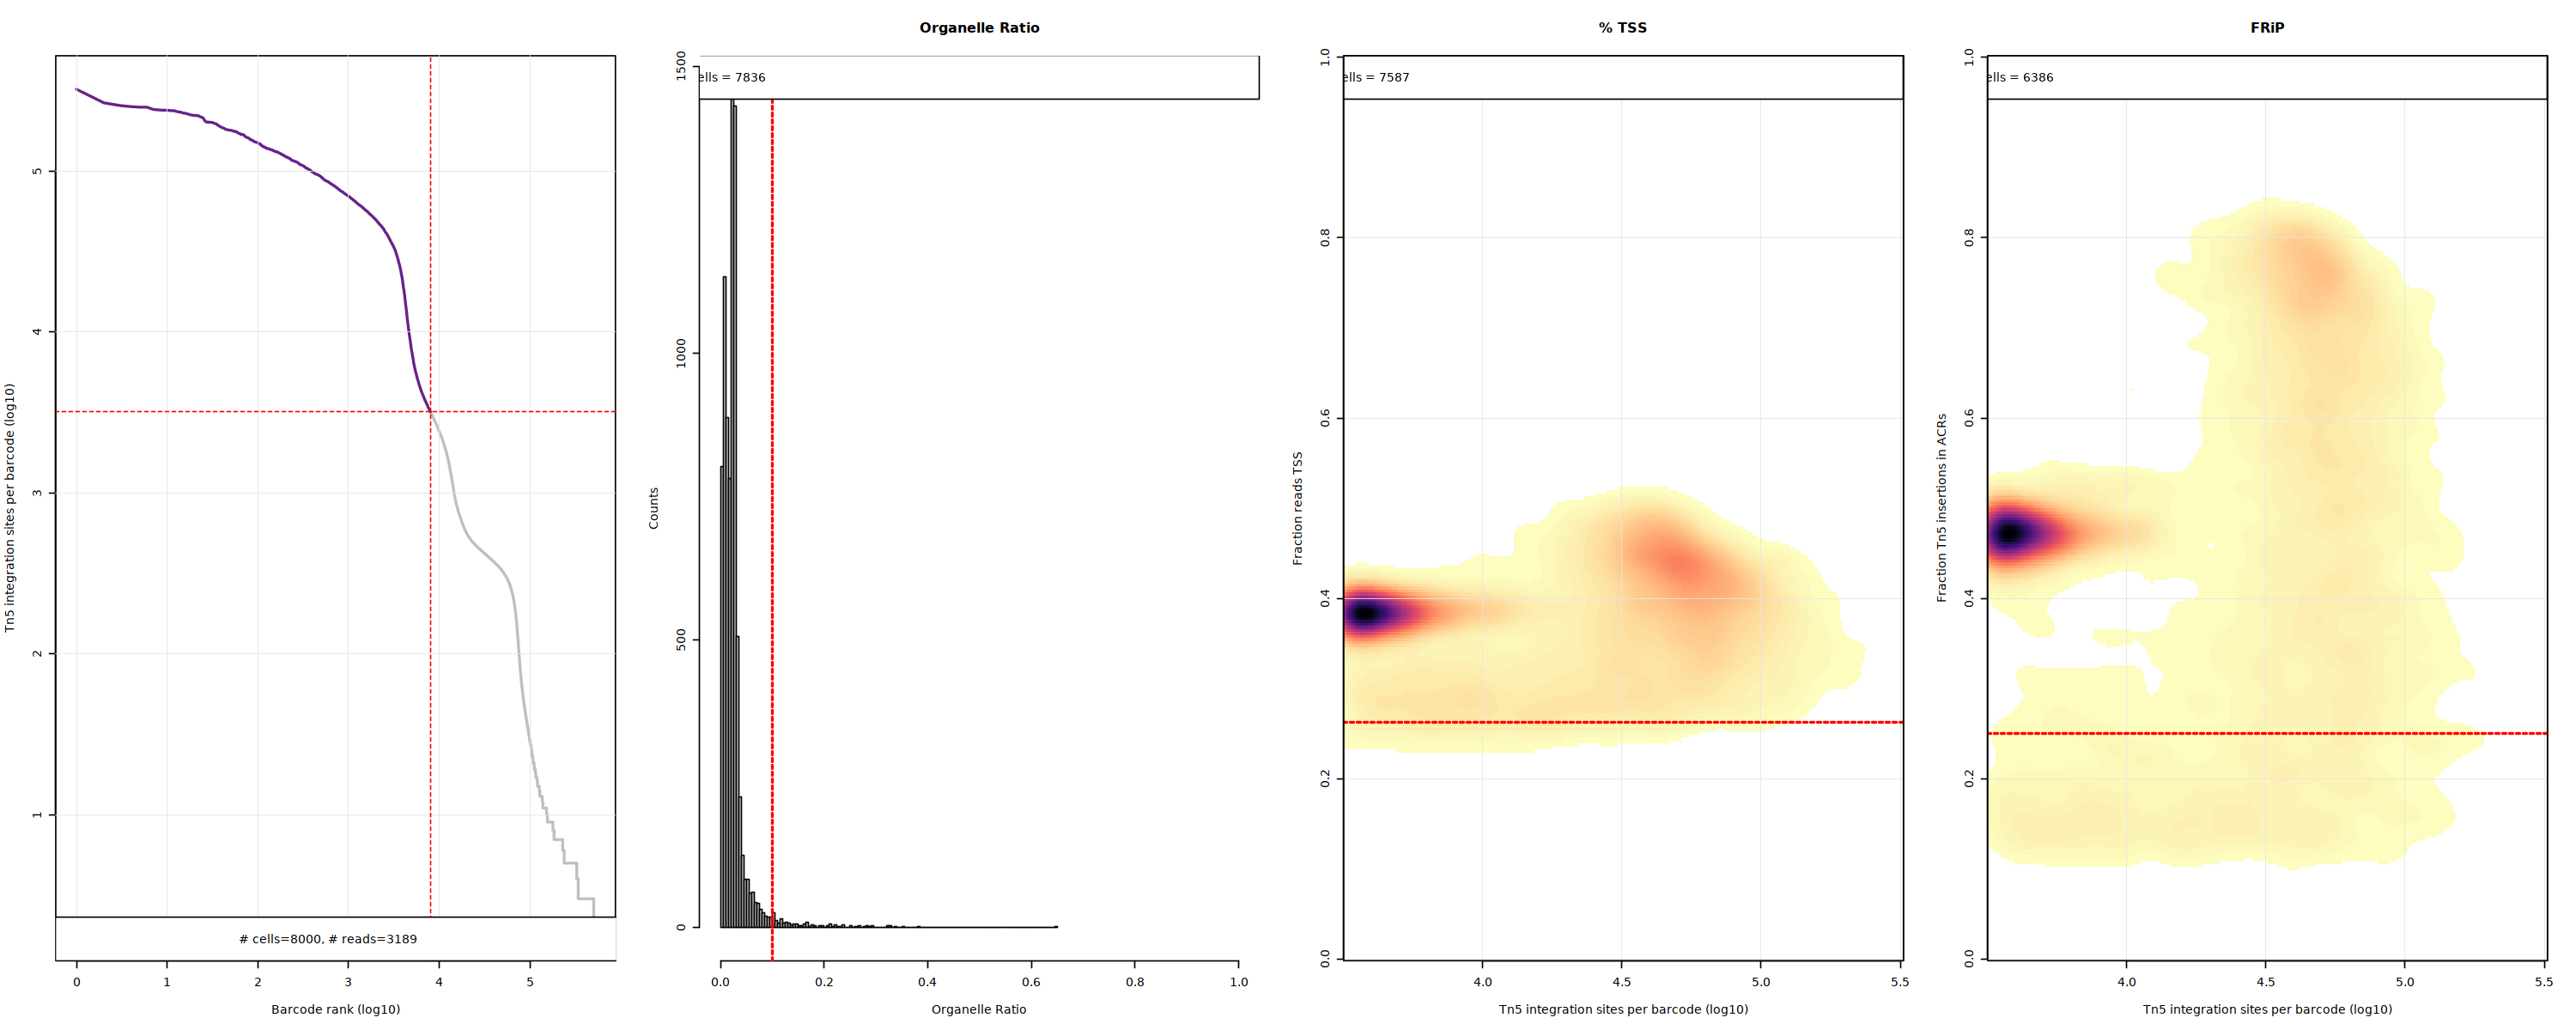

In [20]:
#library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/QC_output/imgs/"

options(repr.plot.width=25, repr.plot.height=10)
Orz_P1.leaf.rep2.meta_file <- findCells(Orz_P1.leaf.rep2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=1000,
                                        max.cells=8000,
                                        min.cells = 200,
                                        min.tn5=1000,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.10,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.1,
                                        prefix=NULL)


In [21]:
library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/QC_output/imgs/"
pre <- "Orz_fusca.sciATAC_rep2"


options(repr.plot.width=25, repr.plot.height=10)
Orz_P1.leaf.rep2.meta <- findCells(Orz_P1.leaf.rep2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=8000,
                                        min.cells = 200,
                                        min.tn5=100,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.10,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=paste0(output_path_imgs, pre))


Making Dotplot

... Filtering Cells based of Oragnelle Reads



In [38]:
# generate sparse matrix
Orz_P1.leaf.rep2.meta_file.filtered <- generateMatrix(Orz_P1.leaf.rep2.meta,
                            filtered=FALSE,
                            windows=500,
                            organelle_scaffolds = c("ChrMt", "ChrPt"), 
                            peaks=F,
                            blacklist="/home/jpm73279/genome_downloads/Osativa/Os.blacklist.haidong.filtered.named.bed",
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [15]:
#str(Orz_P1.leaf.rep2.meta_file.filtered)

ERROR: Error in str(Orz_P1.leaf.rep2.meta_file.filtered): object 'Orz_P1.leaf.rep2.meta_file.filtered' not found


In [39]:
#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

Orz_P1.leaf.rep2.meta_file.filtered <- isCell(Orz_P1.leaf.rep2.meta_file.filtered,
      num.ref = 5000, verbose = TRUE)

 - converting triplet format to sparseMatrix

 - setting filters

 - parsing initial boundaries

 - normalizing distributions and creating references

 - performing feature selection (this step is a bottle-neck and may take a while to complete)

 - estimating correlations



In [40]:
#save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"
##library(tidyverse)
passing_cells <- Orz_P1.leaf.rep2.meta_file.filtered$meta  %>% 
    dplyr::filter(is_cell == 1)



Orz_P1.leaf.rep2.meta_file.filtered$meta.v3 <- passing_cells
    

In [41]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/"
pre <- "Oryza_sativa.scATAC_rep2"

# convert to Socrates format for downstream analysis.-
sb_leaf_rep_2.filtered.sparse <- convertSparseData(Orz_P1.leaf.rep2.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_2.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_2.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Orz_P1.leaf.rep2.meta_file.filtered, file=sb.obj.leaf_rep_2.save)
saveRDS(sb_leaf_rep_2.filtered.sparse, file=sb.soc.leaf_rep_2.save)

 - converting triplet format to sparseMatrix



In [42]:
sum(Orz_P1.leaf.rep1.meta_file.filtered$meta$ptmt < 2)

[1] 312095

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
library("dplyr")
Orz_P1.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::mutate(prop_ptmt = ptmt/total)  %>% 
    ggplot(., aes(prop_ptmt)) + geom_histogram(binwidth = 1)